In [12]:
import pytesseract
from PIL import Image
import requests
from io import BytesIO
import cv2
import numpy as np
import re

In [8]:
pytesseract.pytesseract.tesseract_cmd = r"D:\Tesseract-OCR\tesseract.exe"

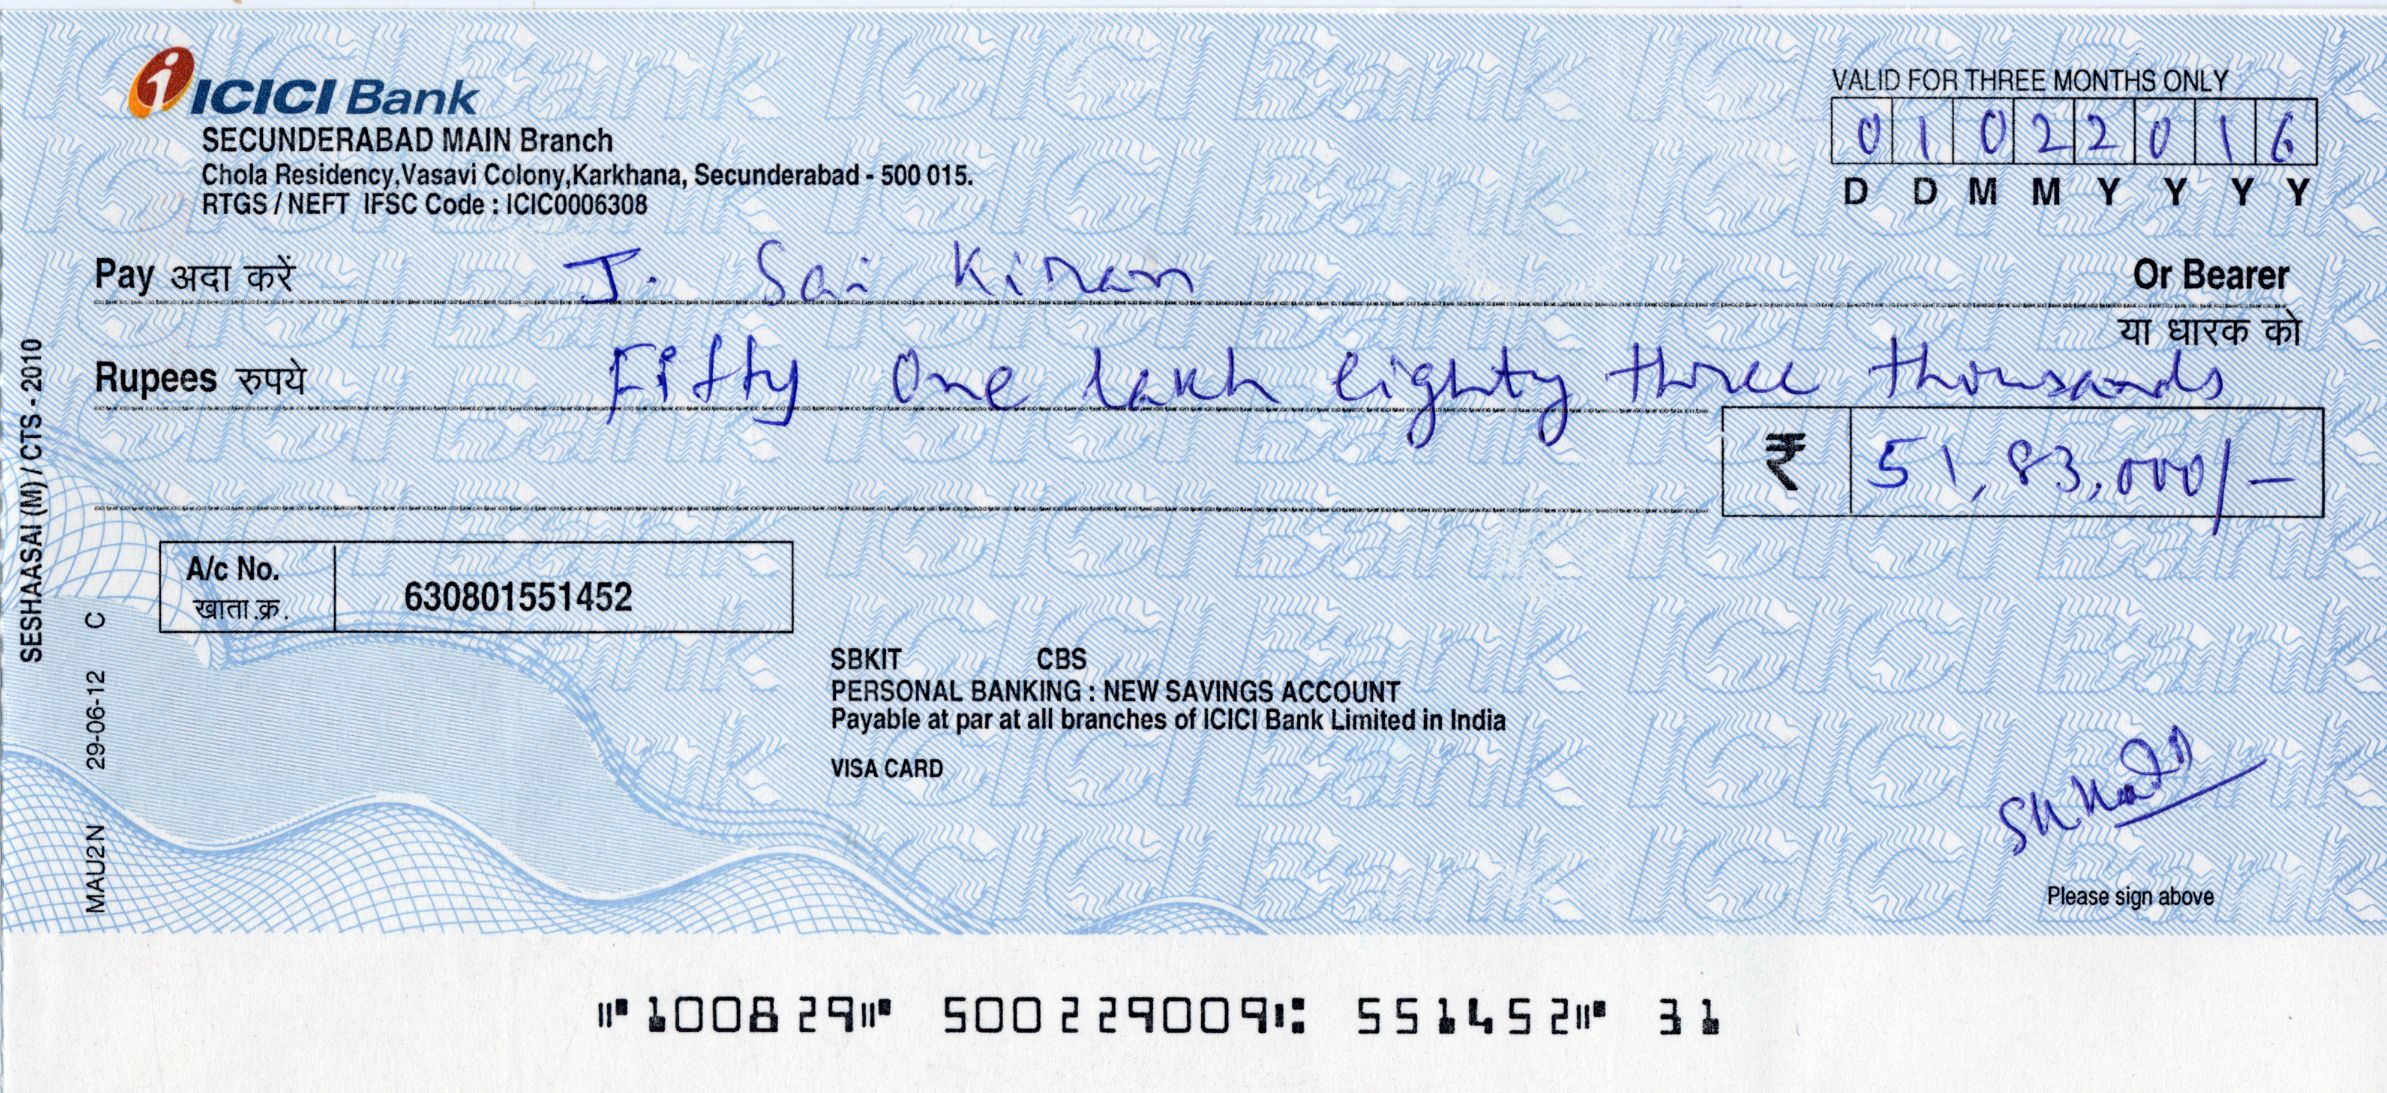

In [10]:
image = Image.open(r"D:\final_year_project\cheque_dataset\Images\Cheque100829.jpg")
image

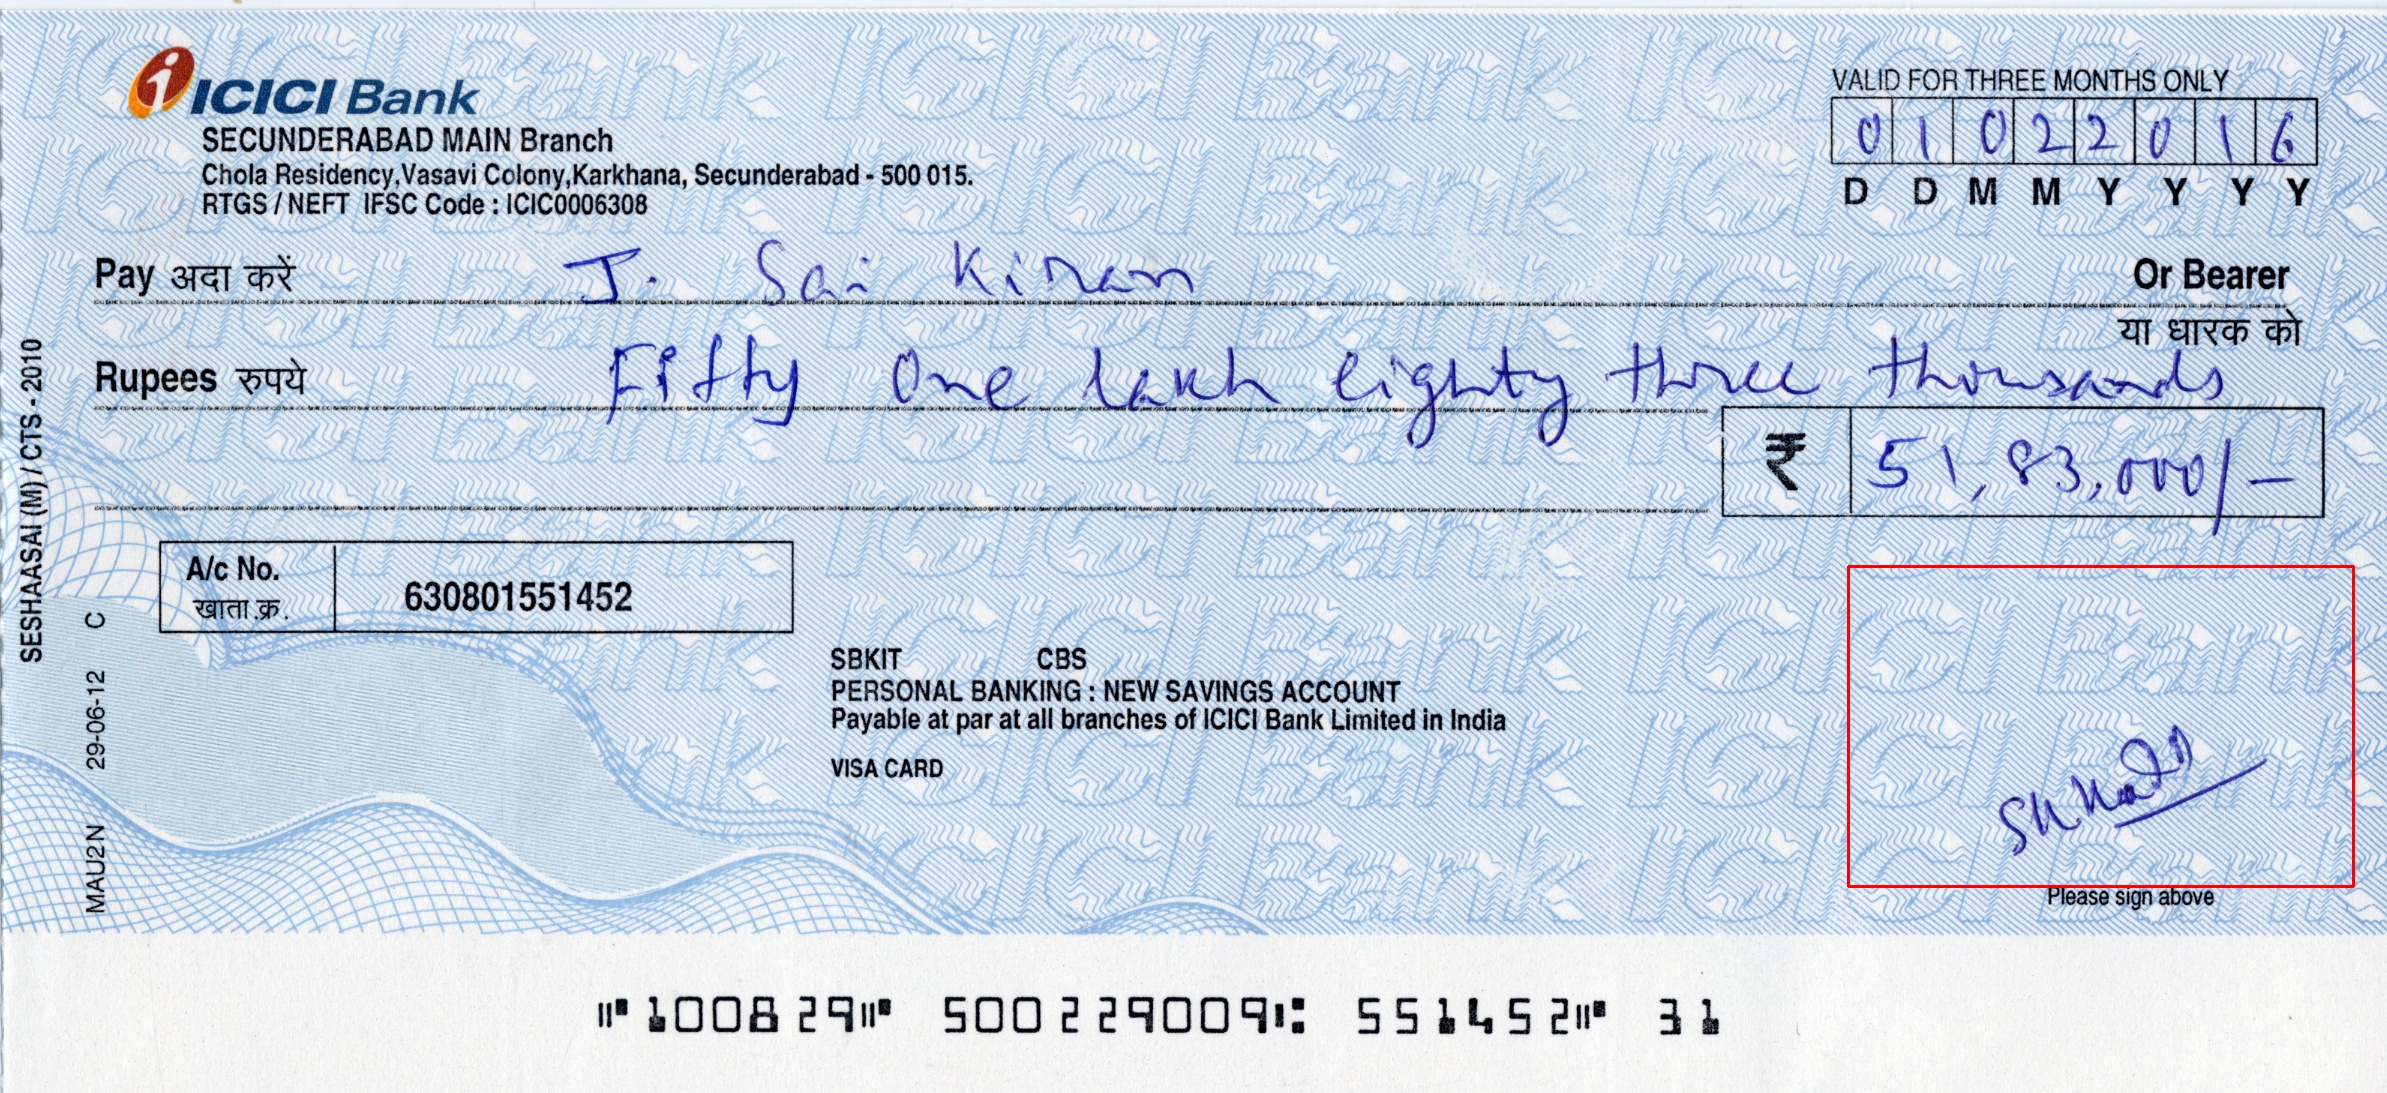

In [4]:
import cv2
import pytesseract
from IPython.display import display, Image

image = cv2.imread(r"D:\final_year_project\cheque_dataset\Images\Cheque100829.jpg")

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

text = pytesseract.image_to_string(gray)

data = pytesseract.image_to_data(gray, output_type=pytesseract.Output.DICT)
x = y = w = h = 0
for i in range(len(data["text"])):
    if data["text"][i].lower() == "please" and data["text"][i+1].lower() == "sign" and data["text"][i+2].lower() == "above":
        x = data["left"][i]-200
        y = data["top"][i+2]
        w = data["width"][i+2]+450
        h = data["height"][i+2]+300
        break

cv2.rectangle(image, (x, y-h), (x+w, y), (0, 0, 255), 2)

crop_img = image[y-h:y, x:x+w]
cv2.imwrite("cropped_image.jpg", crop_img)
retval, buffer = cv2.imencode('.jpg', image)
jpg_as_text = buffer.tobytes()
display(Image(data=jpg_as_text))


In [13]:
import cv2
import numpy as np

img = cv2.imread(r"D:\final_year_project\cheque_dataset\Images\Cheque100830.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

alpha = 1.5
beta = -10

new = alpha * img + beta
new = np.clip(new, 0, 255).astype(np.uint8)
text = pytesseract.image_to_string(new)
#print(text)
# Define a regular expression pattern to match the account number
pattern = r'[0-9]{9,18}'

# Find the account number in the extracted text
match = re.search(pattern, text)

if match:
    account_number = match.group(0)
    print("Account Number:", account_number)
else:
    print("Account number not found.")


cv2.imshow('Thresholded Image', new)
cv2.waitKey(0)
cv2.destroyAllWindows()


Account Number: 630801551452


In [14]:
import cv2
import numpy as np
import pytesseract

# Set the path to the image file
image_path = r"D:\final_year_project\cheque_dataset\Images\Cheque309127.jpg"

# Set the alpha and beta values for the alpha-beta transformation
alpha = 1.5
beta = -10

img = cv2.imread(image_path)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

try:

    text = pytesseract.image_to_string(gray)


    data = pytesseract.image_to_data(gray, output_type=pytesseract.Output.DICT)
    x = y = w = h = 0
    for i in range(len(data["text"])):
        if data["text"][i].lower() == "please" or data["text"][i + 1].lower() == "sign" or data["text"][
            i + 2].lower() == "above":
            x = data["left"][i] - 250
            y = data["top"][i + 2]
            w = data["width"][i + 2] + 460
            h = data["height"][i + 2] + 300
            break
    else:

        print("Text 'please sign above' not found in the image, skipping image")
        exit()

    cv2.rectangle(img, (x, y - h), (x + w, y), (0, 0, 255), 2)

    crop_img = img[y - h:y, x:x + w]


    cv2.imshow("Cropped Image", crop_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

except Exception as e:
    print(f"Error processing the image: {e}")
    new = alpha * img + beta
    new = np.clip(new, 0, 255).astype(np.uint8)
    cv2.imshow("Failed Image", new)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
